In [2]:
#Importing all the necessary packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
import itertools
pd.options.display.float_format = '{:,.5f}'.format
warnings.filterwarnings("ignore")
%matplotlib inline
from scipy.stats.mstats import kruskalwallis
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
import pickle as pkl

# Reading and loading the data from the csv file through the Kaggle API

In [4]:
#Linking the google colab with our own google drive for storing files

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#Creating a new directory in the root folder
!mkdir -p ~/.kaggle

#Copying our Kaggle API key to the new folder
!cp /content/gdrive/MyDrive/Kaggle/kaggle.json ~/.kaggle/

# Check the file in its new directory
!ls /root/.kaggle/

# Check the file permission
!ls -l ~/.kaggle/kaggle.json

#Change the file permission
# chmod 600 file – owner can read and write
# chmod 700 file – owner can read, write and execute

!chmod 600 ~/.kaggle/kaggle.json

kaggle.json
-rw------- 1 root root 66 May 13 10:14 /root/.kaggle/kaggle.json


In [6]:
#Downloading the data through the Kaggle API to the local filesystem
!kaggle competitions download -c reducing-commercial-aviation-fatalities

100% 1.67G/1.67G [00:18<00:00, 82.5MB/s]
100% 1.67G/1.67G [00:18<00:00, 95.3MB/s]
 85% 35.0M/41.2M [00:00<00:00, 104MB/s] 
100% 41.2M/41.2M [00:00<00:00, 115MB/s]
 99% 430M/435M [00:06<00:00, 104MB/s] 
100% 435M/435M [00:06<00:00, 73.1MB/s]


# Optimizing the datatypes for efficient data storage into the computer memory

In [9]:
#Optimizng the datatypes for efficient data storage into the computer memory
datatypes = {}
datatypes['crew']=np.int8

for col in [ 'time', 'eeg_fp1', 'eeg_f7', 'eeg_f8','eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
            'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr']:
       datatypes[col]=np.float32

In [10]:
#Unzipping the 

!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [11]:
#Reading the train data csv file
df = pd.read_csv('train.csv',dtype=datatypes)

# Profiling the data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 28 columns):
 #   Column      Dtype  
---  ------      -----  
 0   crew        int8   
 1   experiment  object 
 2   time        float32
 3   seat        int64  
 4   eeg_fp1     float32
 5   eeg_f7      float32
 6   eeg_f8      float32
 7   eeg_t4      float32
 8   eeg_t6      float32
 9   eeg_t5      float32
 10  eeg_t3      float32
 11  eeg_fp2     float32
 12  eeg_o1      float32
 13  eeg_p3      float32
 14  eeg_pz      float32
 15  eeg_f3      float32
 16  eeg_fz      float32
 17  eeg_f4      float32
 18  eeg_c4      float32
 19  eeg_p4      float32
 20  eeg_poz     float32
 21  eeg_c3      float32
 22  eeg_cz      float32
 23  eeg_o2      float32
 24  ecg         float32
 25  r           float32
 26  gsr         float32
 27  event       object 
dtypes: float32(24), int64(1), int8(1), object(2)
memory usage: 561.7+ MB


In [13]:
df.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.01172,1,-5.28545,26.77580,-9.52731,-12.79320,16.71780,33.73750,23.71230,-6.69587,29.23210,24.84290,3.92134,18.44700,1.07547,3.09029,37.36900,17.43760,19.20190,20.59680,-3.95115,14.50760,"-4,520.00000",817.70599,388.82999,A
1,1,CA,0.01562,1,-2.42842,28.43090,-9.32351,-3.75723,15.96930,30.44360,21.01030,-6.47472,26.64140,24.13880,5.46991,20.51060,2.83354,7.10177,31.17080,19.39970,19.68950,21.35470,1.33212,17.75020,"-4,520.00000",817.70599,388.82999,A
2,1,CA,0.01953,1,10.67150,30.42020,15.35070,24.72400,16.14310,32.14280,25.43180,-0.08871,28.11990,26.89130,8.57886,23.16290,4.51993,12.70550,-12.01260,19.39630,23.17170,22.40760,1.53786,22.24700,"-4,520.00000",817.70599,388.82999,A
3,1,CA,0.02344,1,11.45250,25.60980,2.43308,12.41250,20.53330,31.49410,19.14280,-0.25652,30.65360,24.24700,8.64310,19.96190,7.27575,11.45980,18.57410,23.15640,22.64120,19.33670,2.54492,18.99860,"-4,520.00000",817.70599,388.82999,A
4,1,CA,0.02734,1,7.28321,25.94260,0.11356,5.74800,19.83360,28.75360,20.57210,-1.95347,31.72260,25.15550,12.50030,18.74690,7.30976,8.00805,6.55544,22.75470,22.67030,20.29320,1.69962,22.81280,"-4,520.00000",817.70599,388.82999,A


In [ ]:
#Getting information regarding the various statistics of all the continuous column variables
df.describe()

,crew,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
count,"4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000","4,867,421.00000"
mean,5.53878,177.85599,0.49995,3.74653,1.35996,1.21364,0.07351,0.07846,0.08675,0.22998,3.62736,0.18364,0.26505,0.44074,1.38539,1.31619,1.20853,0.60498,0.24138,0.19476,0.62434,0.44291,0.23937,"5,308.64209",738.42737,851.99896
std,3.40935,103.76466,0.50000,44.85974,34.99023,35.06101,24.22352,17.91621,18.22733,25.19746,45.92398,27.94756,16.49277,63.78222,42.72685,54.76573,41.86945,20.42082,16.51435,18.21770,19.65821,19.64158,23.35904,"12,143.21387",82.29544,502.04810
min,1.00000,0.00300,0.00000,"-1,361.35999","-1,581.32996","-1,643.94995","-1,516.64001","-1,220.51001","-1,266.43005","-1,279.93994","-1,393.47998","-2,887.90991","-1,226.78003","-2,875.93994","-1,353.41003","-4,064.07007","-2,333.83008","-1,212.03003","-1,228.03003","-1,229.13000","-1,230.47998",-696.27899,"-1,176.37000","-18,585.69922",482.06000,0.00000
25%,3.00000,88.08100,0.00000,-9.20025,-8.32515,-8.76761,-7.36724,-6.10200,-6.00726,-6.90403,-9.57500,-6.65734,-6.58046,-7.64364,-9.28555,-8.05544,-9.30643,-7.49597,-6.71386,-6.77484,-7.16116,-7.81765,-6.52695,"-2,550.07007",663.14301,524.11401
50%,5.00000,176.92969,0.00000,0.38190,0.04264,0.11404,0.00000,0.00000,0.00000,0.00000,0.38934,0.00000,0.00000,0.00000,0.11708,0.11067,0.05667,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,"5,920.50977",743.43799,770.19702
75%,7.00000,268.33984,1.00000,10.30610,8.75334,9.28256,7.43778,6.17663,6.08646,7.07146,10.62990,6.78108,6.74435,7.81001,9.95549,8.63161,9.77577,7.76567,6.83132,6.90502,7.46652,8.02519,6.61518,"10,290.09961",813.41199,"1,197.12000"
max,13.00000,360.37109,1.00000,"1,972.23999","2,048.79004","2,145.70996","1,731.88000",900.93701,"1,176.54004","1,514.81995","2,103.30005","1,879.32996",931.62701,"2,162.22998","1,381.37000","3,893.33008","2,034.17004",891.72900,908.08899,"1,435.80005",928.40698,613.66901,"2,443.55005","34,188.30078",840.18402,"1,999.85999"


In [ ]:
#Finding the no of Null Values
df.isnull().sum()

crew          0
experiment    0
time          0
seat          0
eeg_fp1       0
eeg_f7        0
eeg_f8        0
eeg_t4        0
eeg_t6        0
eeg_t5        0
eeg_t3        0
eeg_fp2       0
eeg_o1        0
eeg_p3        0
eeg_pz        0
eeg_f3        0
eeg_fz        0
eeg_f4        0
eeg_c4        0
eeg_p4        0
eeg_poz       0
eeg_c3        0
eeg_cz        0
eeg_o2        0
ecg           0
r             0
gsr           0
event         0
dtype: int64

As we can see from the code above there are no missing values present in the dataset

In [ ]:
experiment_values=df.experiment.values
unique_experiments = set(experiment_values)

for exp in unique_experiments:
    print('The unique events present for experiment {} are'.format(exp))
    print(df.loc[df.experiment==exp].event.unique(),'\n')

The unique events present for experiment DA are
['A' 'D'] 

The unique events present for experiment SS are
['A' 'B'] 

The unique events present for experiment CA are
['A' 'C'] 



# **Performing univariate analysis for each continuous variable in the dataset**

In [ ]:
#Defining the categorical and numerical columns for our dataset
threshold=10

categorical_cols = [col for col in df.columns if (df[col].nunique()<threshold)]
numerical_cols = [col for col in df.columns if (df[col].nunique()>threshold)]
eeg_cols = [col for col in numerical_cols if col.startswith('eeg')]

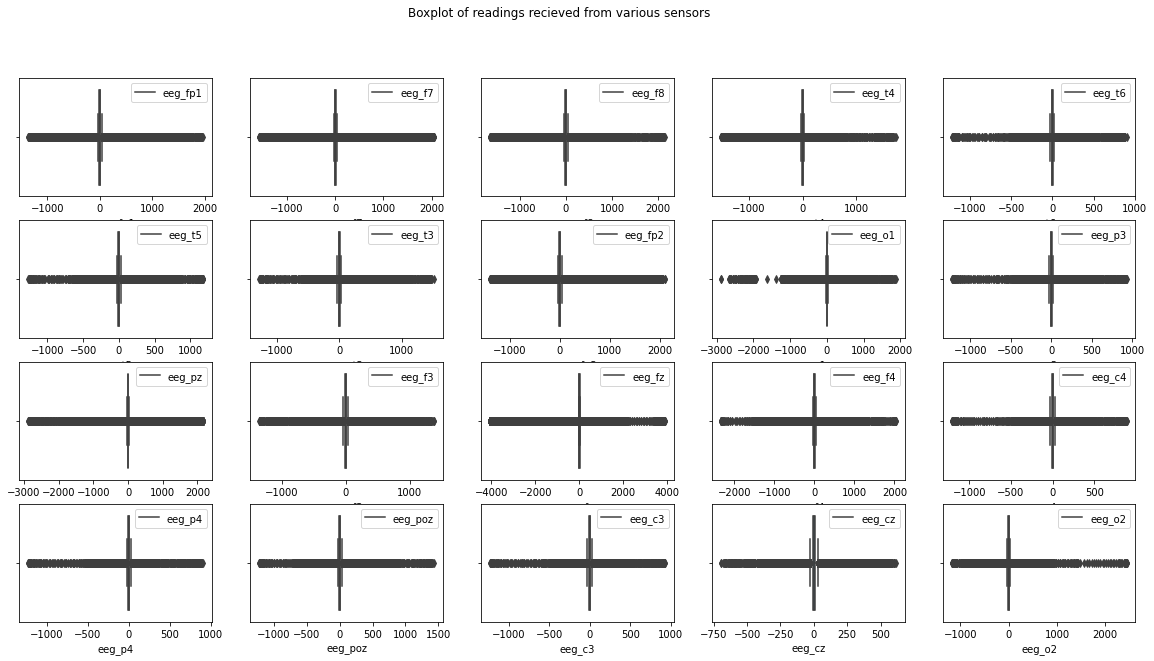

In [ ]:
#Plotting the boxplot of eeg sensor related columns
figure,axs = plt.subplots(4,5, figsize=(20, 10), facecolor='w', edgecolor='k')
figure.suptitle('Boxplot of readings recieved from various sensors')

axs = axs.flatten()

for ax,col in zip(axs.flatten(),eeg_cols):
    sns.boxplot(df[col],ax=ax)
    ax.legend([col])
    ax.set_yticklabels([])

From the code above we can see that all the 'eeg' sensor related variables have considerable amount of 
outliers present.
We need to preprocess these variables in order to use them for further analysis

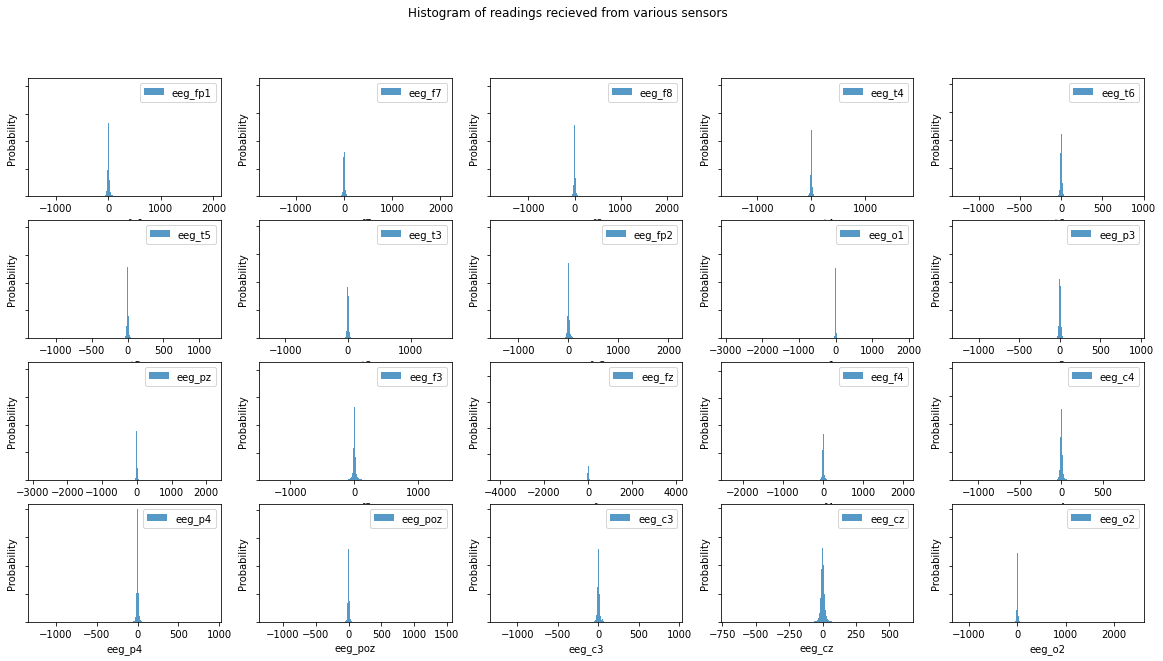

In [ ]:
#Plotting the histogram of eeg sensor related columns
figure,axs = plt.subplots(4,5, figsize=(20, 10), facecolor='w', edgecolor='k')
figure.suptitle('Histogram of readings recieved from various sensors')

axs = axs.flatten()

for ax,col in zip(axs.flatten(),eeg_cols):
    sns.histplot(df[col],ax=ax,stat='probability')
    ax.legend([col])
    ax.set_yticklabels([])

In [ ]:
non_eeg_cols = [col for col in numerical_cols if col not in eeg_cols]

**Determing the distribution of other numerical variables through boxplots and lineplots**

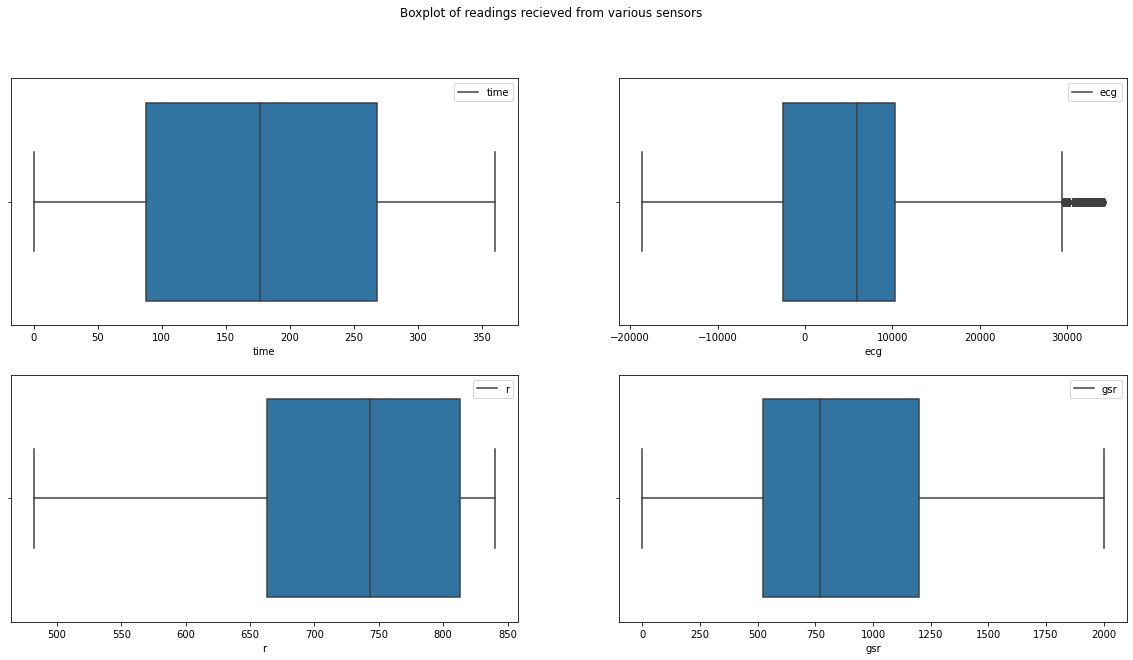

In [ ]:
figure,axs = plt.subplots(2,2, figsize=(20, 10), facecolor='w', edgecolor='k')
figure.suptitle('Boxplot of readings recieved from various sensors')
axs = axs.flatten()

for ax,col in zip(axs,non_eeg_cols):
    sns.boxplot(df[col],ax=ax)
    ax.legend([col])

As we can see from the code above that the 'ecg'variable contains decent no. of outliers from it's boxplot

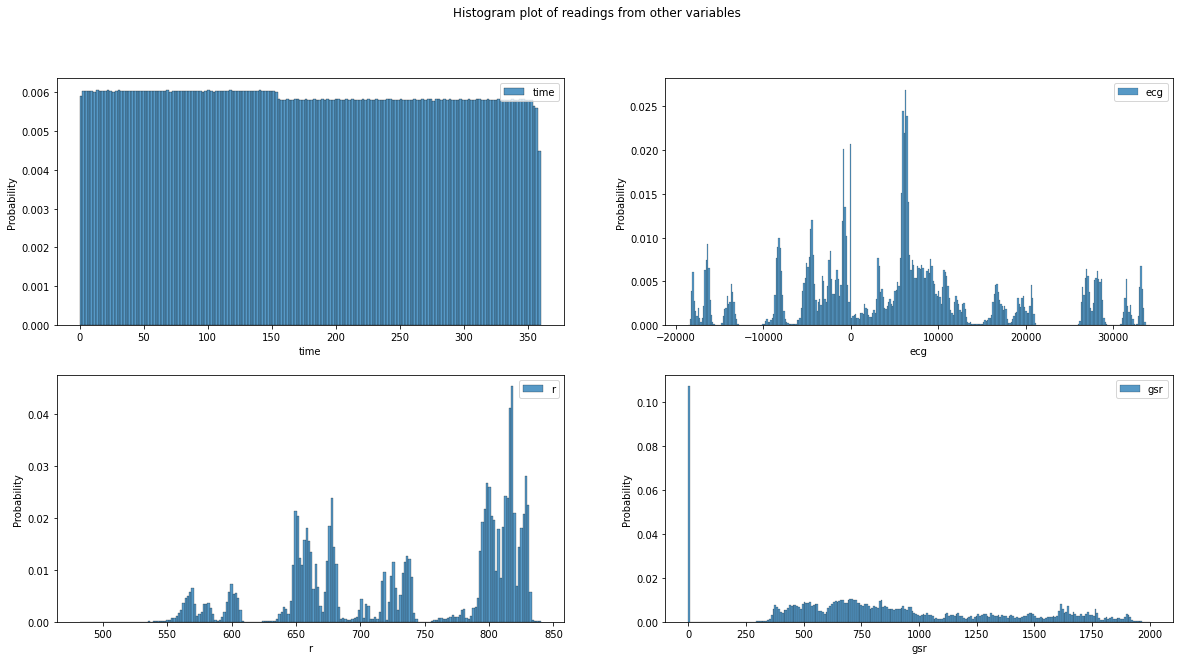

In [ ]:
figure,axs = plt.subplots(2,2, figsize=(20, 10), facecolor='w', edgecolor='k')
figure.suptitle('Histogram plot of readings from other variables')
axs = axs.flatten()

for ax,col in zip(axs,non_eeg_cols):
    sns.histplot(df[col],ax=ax,stat='probability')
    ax.legend([col])

# **Performing univariate analysis for each categorical variable in the dataset**

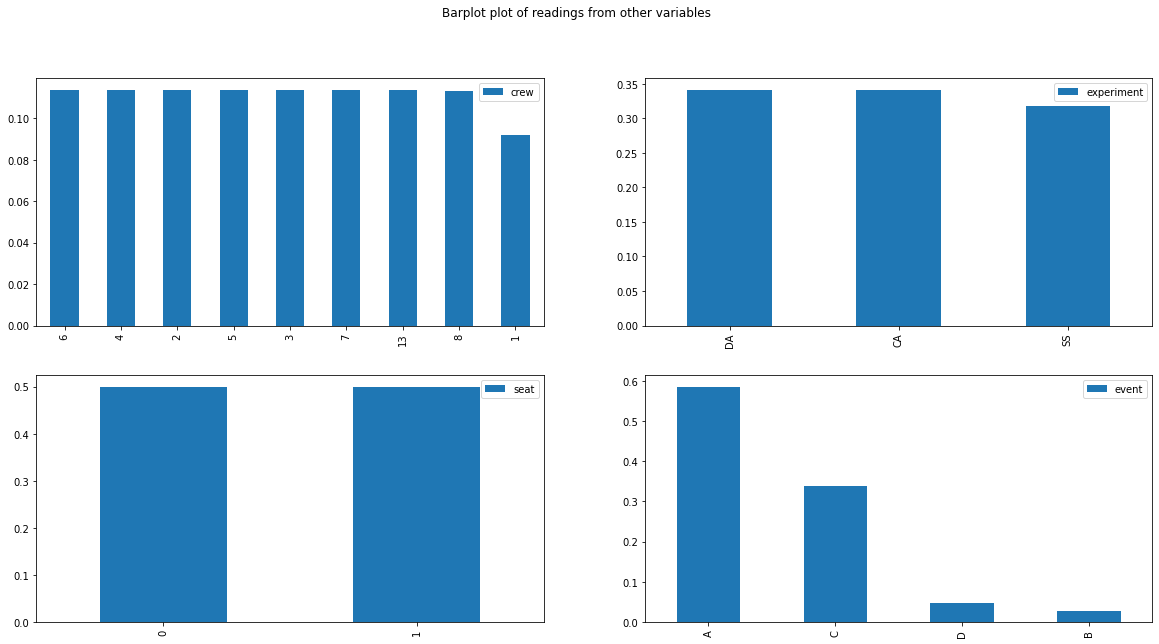

In [ ]:
figure,axs = plt.subplots(2,2, figsize=(20, 10), facecolor='w', edgecolor='k')
figure.suptitle('Barplot plot of readings from other variables')
axs = axs.flatten()

for ax,col in zip(axs,categorical_cols):
    (df[col].value_counts()/len(df)).plot(kind='bar',ax=ax)
    ax.legend([col])

# Removing outliers from continuous variables of the dataframe

In [ ]:
#Function to remove outliers
def remove_outlier(df,col):
    q1=np.percentile(df[col],25)
    q3=np.percentile(df[col],75)

    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr) 
    lower_bound = q1 - (1.5 * iqr)

    upper_value = np.percentile(df[col],90)
    lower_value = np.percentile(df[col],10)

    df.loc[df[col] >= upper_bound, col] = upper_value 
    df.loc[df[col] <= lower_bound, col] = lower_value
    return df

In [ ]:
#df_new=df.copy()
for col in numerical_cols:
    df=remove_outlier(df,col)

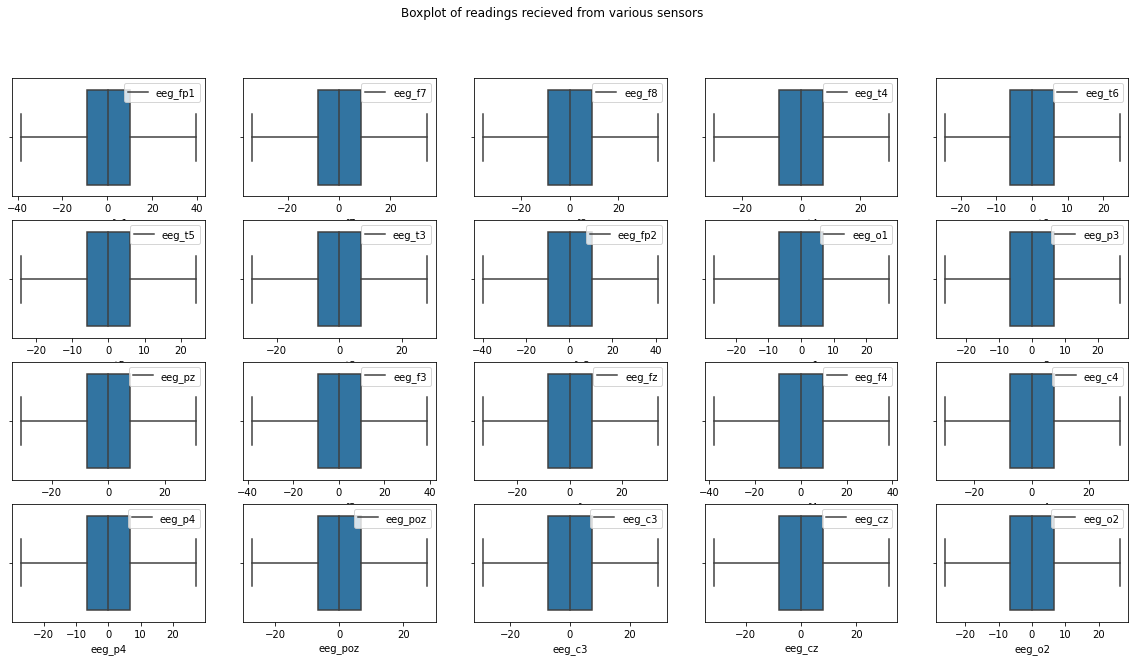

In [ ]:
#Plotting the boxplot of eeg sensor related columns
figure,axs = plt.subplots(4,5, figsize=(20, 10), facecolor='w', edgecolor='k')
figure.suptitle('Boxplot of readings recieved from various sensors')

axs = axs.flatten()

for ax,col in zip(axs.flatten(),eeg_cols):
    sns.boxplot(df[col],ax=ax)
    ax.legend([col])
    ax.set_yticklabels([])

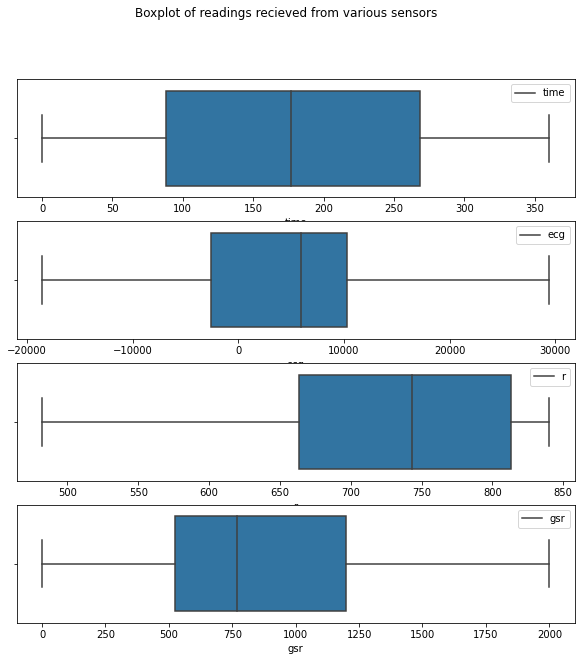

In [ ]:
#Plotting the boxplot of eeg sensor related columns
figure,axs = plt.subplots(4,1, figsize=(10, 10), facecolor='w', edgecolor='k')
figure.suptitle('Boxplot of readings recieved from various sensors')

axs = axs.flatten()

for ax,col in zip(axs.flatten(),non_eeg_cols):
    sns.boxplot(df[col],ax=ax)
    ax.legend([col])
    ax.set_yticklabels([])

From the code above we can see that the outliers have been successfully reoved from the dataset

In [ ]:
categorical_cols.remove('event')

In [ ]:
categorical_cols

['crew', 'experiment', 'seat']

# Performing bivariate analysis of the dataset

Analysis for the crew variable

In [ ]:
for col in categorical_cols:
    df[col]=df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 28 columns):
 #   Column      Dtype   
---  ------      -----   
 0   crew        category
 1   experiment  category
 2   time        float32 
 3   seat        category
 4   eeg_fp1     float32 
 5   eeg_f7      float32 
 6   eeg_f8      float32 
 7   eeg_t4      float32 
 8   eeg_t6      float32 
 9   eeg_t5      float32 
 10  eeg_t3      float32 
 11  eeg_fp2     float32 
 12  eeg_o1      float32 
 13  eeg_p3      float32 
 14  eeg_pz      float32 
 15  eeg_f3      float32 
 16  eeg_fz      float32 
 17  eeg_f4      float32 
 18  eeg_c4      float32 
 19  eeg_p4      float32 
 20  eeg_poz     float32 
 21  eeg_c3      float32 
 22  eeg_cz      float32 
 23  eeg_o2      float32 
 24  ecg         float32 
 25  r           float32 
 26  gsr         float32 
 27  event       object  
dtypes: category(3), float32(24), object(1)
memory usage: 496.7+ MB


Analysing the experiment variable

In [ ]:
df['crew']=df['crew'].apply(lambda x:str(x))

From the figure above we can see the crosstab relationship between events and crew:
Event 'A','B','C','D' seems to be uniformly distributed between all the crew types except for crew '1'.

Analysing the seat variable

In [ ]:
def chisq_test(col1,col2):
        
    table = pd.crosstab(df[col1],df[col2])
    print("Contingency table is created for columns '{}' and '{}': \n".format(col1,col2))
    print(table,"\n")
    
    # Get column percentages
    col_sum = table.sum(axis=0)
    col_percents = table/col_sum

    stat, p, dof, expected = scipy.stats.chi2_contingency(table)
    print("Chi-square value, p-value, expected_counts")
    #print(stat,p,dof, "\n",expected)
    
    alpha=0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0) \n')
    else:
        print('Independent (H0 holds true) \n')

In [ ]:
categorical_combinations=list(itertools.combinations(categorical_cols, 2))

In [ ]:
for i,j in categorical_combinations:
    chisq_test(i,j)

Contingency table is created for columns 'crew' and 'experiment': 

experiment      CA      DA      SS
crew                              
1           184299  184207   79146
13          184288  184207  184229
2           184232  184293  184343
3           184232  184274  184289
4           184337  184301  184243
5           184252  184292  184271
6           184254  184389  184315
7           184238  184235  184296
8           184244  184195  181520 

Chi-square value, p-value, expected_counts
p value is 0.0
Dependent (reject H0) 

Contingency table is created for columns 'crew' and 'seat': 

seat       0       1
crew                
1     223771  223881
13    276376  276348
2     276458  276410
3     276402  276393
4     276523  276358
5     276433  276382
6     276571  276387
7     276427  276342
8     274978  274981 

Chi-square value, p-value, expected_counts
p value is 0.9999995164938702
Independent (H0 holds true) 

Contingency table is created for columns 'experiment' and 'seat':

Performing the chi-square test between the independent variables and dependent variable

In [ ]:
for i in categorical_cols:
    chisq_test(i,'event')

Contingency table is created for columns 'crew' and 'event': 

event       A      B       C      D
crew                               
1      235891   7689  180853  23219
13     324700  15376  183972  28676
2      326570  15371  183888  27039
3      327147  15337  184062  26249
4      328532  15364  184088  24897
5      326326  15368  183934  27187
6      327851  15348  183888  25871
7      327917  15388  183946  25518
8      323875  15356  184055  26673 

Chi-square value, p-value, expected_counts
p value is 0.0
Dependent (reject H0) 

Contingency table is created for columns 'experiment' and 'event': 

event             A       B        C       D
experiment                                  
CA             5690       0  1652686       0
DA          1423064       0        0  235329
SS          1420055  130597        0       0 

Chi-square value, p-value, expected_counts
p value is 0.0
Dependent (reject H0) 

Contingency table is created for columns 'seat' and 'event': 

event        A  

From the above tests we can infer that we based on the statistical tests we see that the variables 'crew' and 'experiment'
have very high correlation with the target variable.However,based on the chi-square tests between independent variables
we see that these two variables are highly associated with each other.Selecting these two variables at the same time
will lead to multicollinearity.

Hence,we need to select only one out of the given two variables.Out of these variables,experiment variable
has the given set of categorical  values present only for the train set.For the test set all values are marked 
as category 'LOFT'.Hence, it would be suitable to reove this variable and selecting only the 'crew' variable for 
model-building purposes

# Performing bivariate analysis between the numerical variables and the target variable

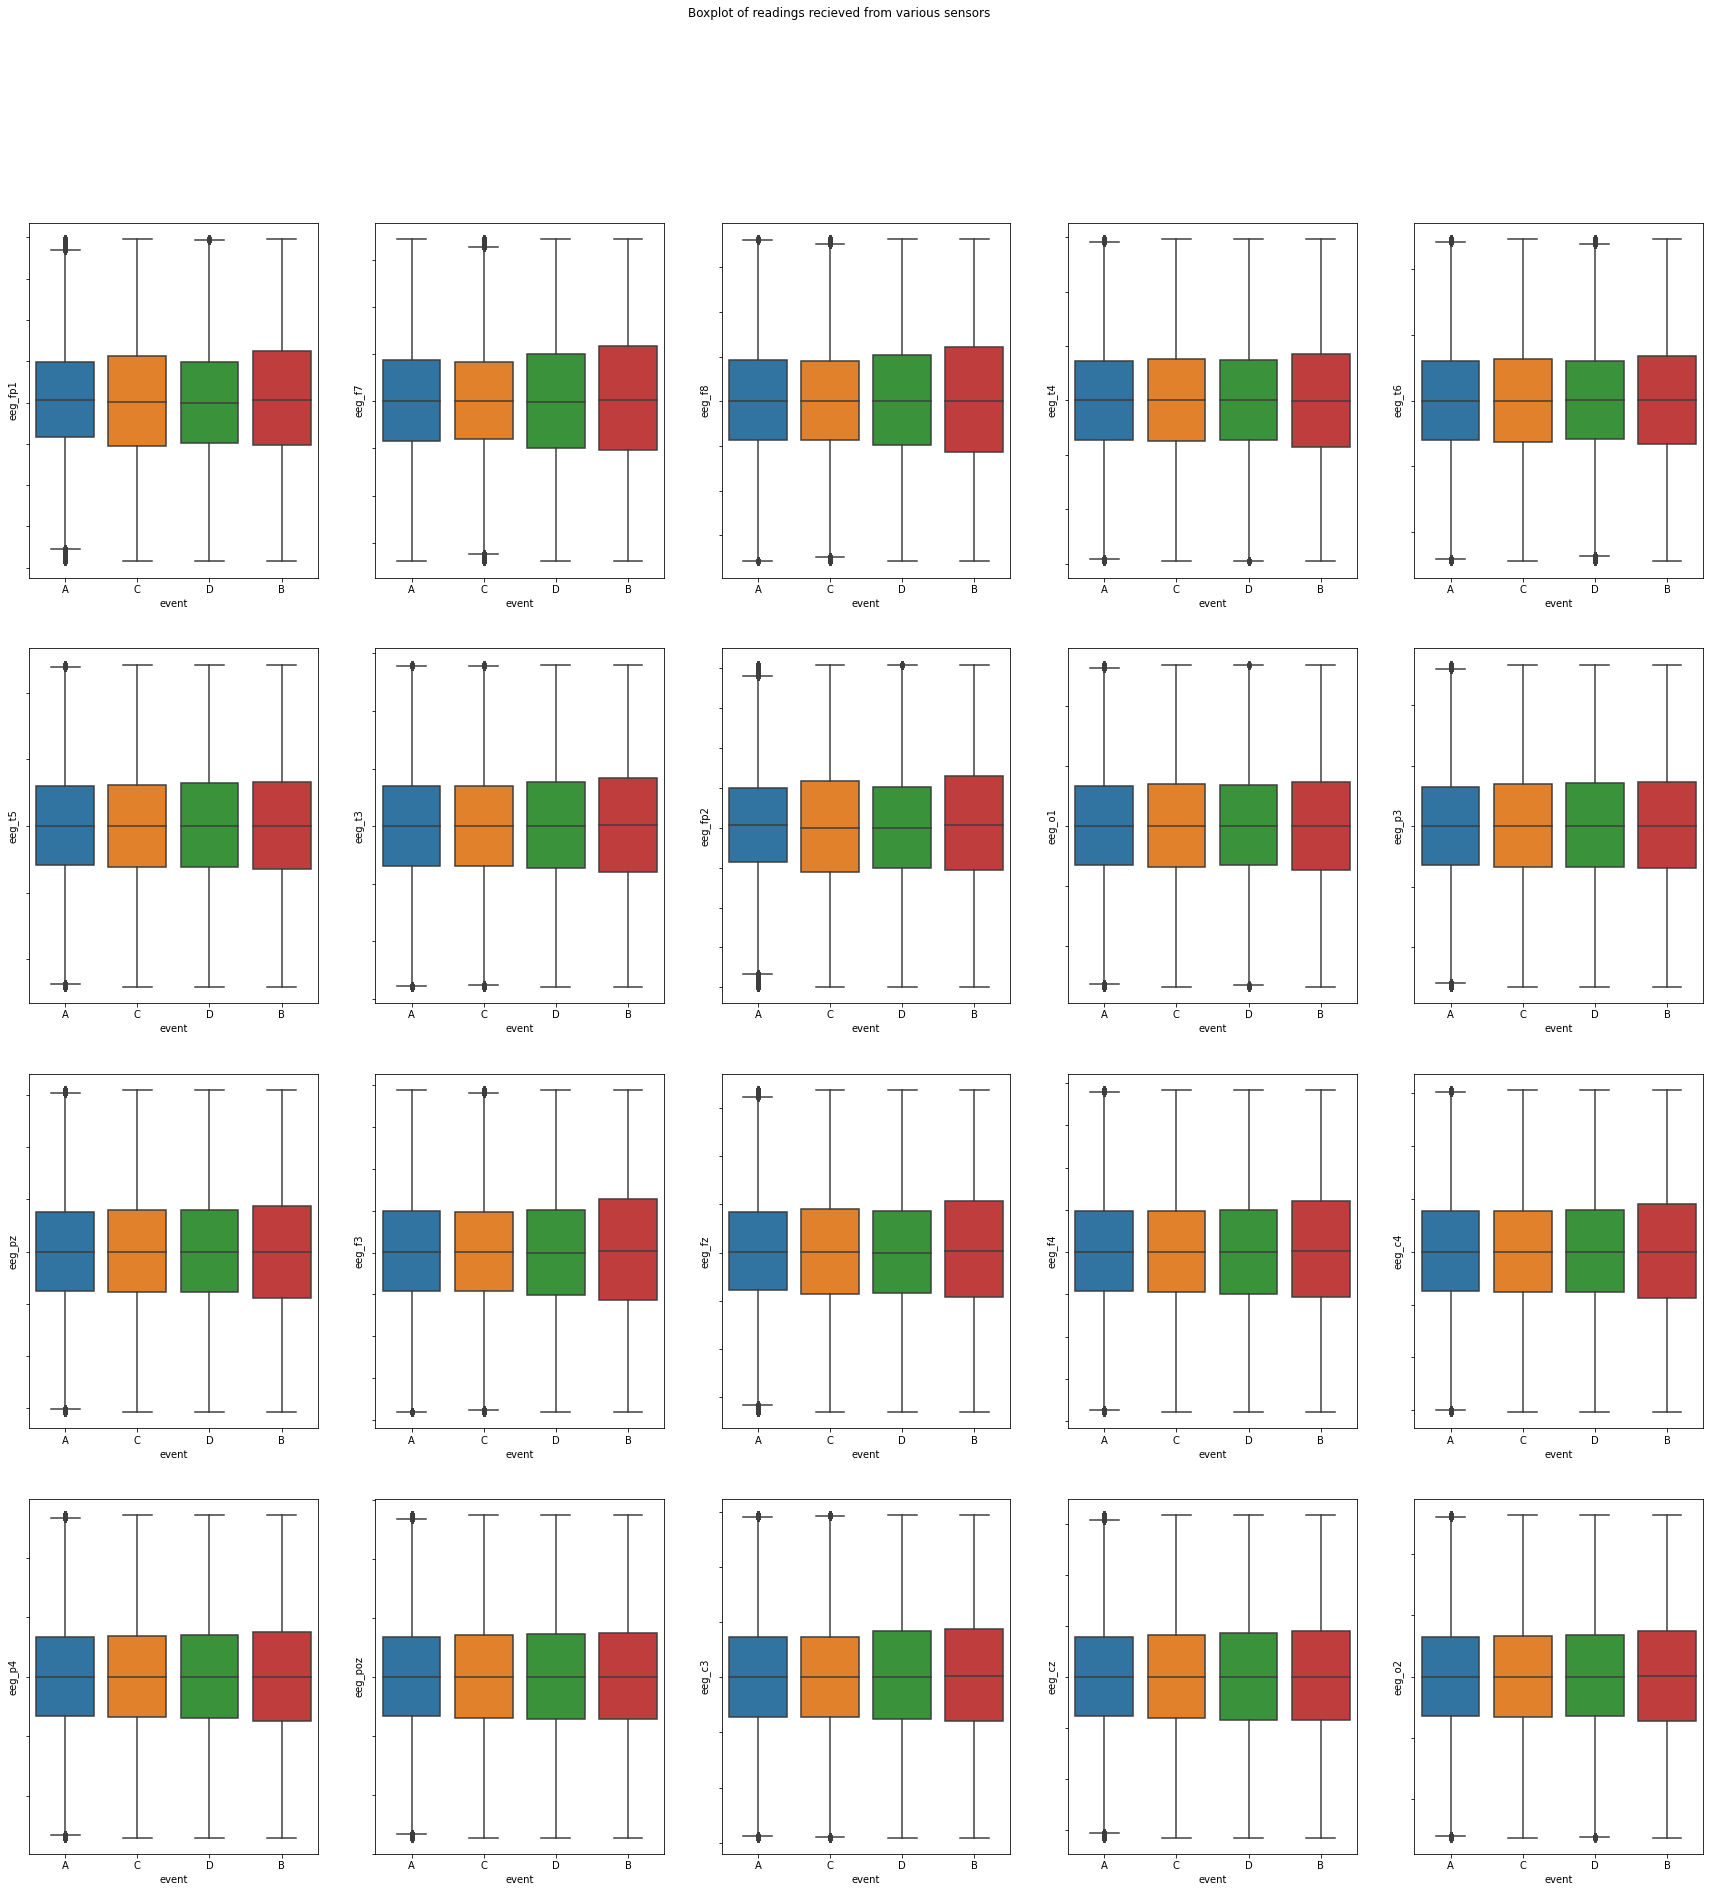

In [ ]:
#Plotting the boxplot of eeg sensor related columns
figure,axs = plt.subplots(4,5, figsize=(30, 30), facecolor='w', edgecolor='k')
figure.suptitle('Boxplot of readings recieved from various sensors')

axs = axs.flatten()

for ax,col in zip(axs.flatten(),eeg_cols):
    sns.boxplot(x=df['event'],y=df[col],ax=ax)
    #ax.legend([col])
    ax.set_yticklabels([])

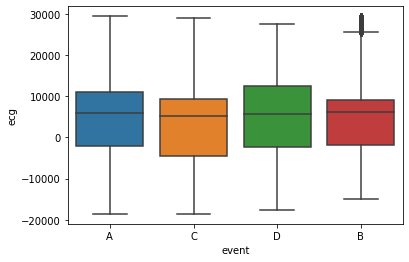

In [ ]:
sns.boxplot(y=df['ecg'],x=df['event'])

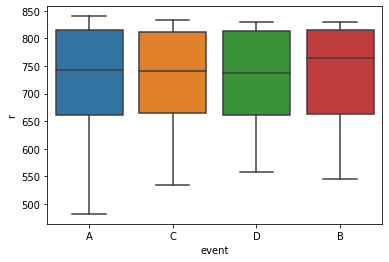

In [ ]:
sns.boxplot(y=df['r'],x=df['event'])

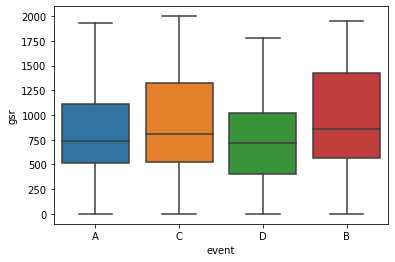

In [ ]:
sns.boxplot(y=df['gsr'],x=df['event'])

Thus based on the code above we can see that we can
see that the variables 'ecg' and 'gsr' are highly correlated with 'event' column

# Performing the feature extraction process on the dataset

In [ ]:
df['minute']=(df['time']//60).apply(int)

In [ ]:
df['eeg_mean'] = df[eeg_cols].mean(axis=1)
df['eeg_min'] = df[eeg_cols].min(axis=1)
df['eeg_var'] = df[eeg_cols].var(axis=1)
df['eeg_std'] = df[eeg_cols].std(axis=1)
df['eeg_max'] = df[eeg_cols].max(axis=1)

In [ ]:
df.event.value_counts()

A    2848809
C    1652686
D     235329
B     130597
Name: event, dtype: int64

In [ ]:
def Kruskal_Wallis_test(col):
    
    reject=0
    accept=0
    for i in range(15):
        col_grouped_A = df.loc[df.event=='A'][col].sample(100000).values
        col_grouped_B = df.loc[df.event=='B'][col].sample(100000).values
        col_grouped_C = df.loc[df.event=='C'][col].sample(100000).values
        col_grouped_D = df.loc[df.event=='D'][col].sample(100000).values
        H, pval = kruskalwallis(col_grouped_A,col_grouped_B,col_grouped_C,col_grouped_D)
        if pval < 0.05:
            reject+=1
        else:
            accept+=1
    results_dict = {'Accept':accept,'reject':reject}

    return results_dict

In [ ]:
for col in numerical_cols:
    print("The results for column variable {} are".format(col))
    print(Kruskal_Wallis_test(col))

The results for column variable time are
{'Accept': 0, 'reject': 15}
The results for column variable eeg_fp1 are
{'Accept': 0, 'reject': 15}
The results for column variable eeg_f7 are
{'Accept': 0, 'reject': 15}
The results for column variable eeg_f8 are
{'Accept': 12, 'reject': 3}
The results for column variable eeg_t4 are
{'Accept': 9, 'reject': 6}
The results for column variable eeg_t6 are
{'Accept': 6, 'reject': 9}
The results for column variable eeg_t5 are
{'Accept': 1, 'reject': 14}
The results for column variable eeg_t3 are
{'Accept': 1, 'reject': 14}
The results for column variable eeg_fp2 are
{'Accept': 0, 'reject': 15}
The results for column variable eeg_o1 are
{'Accept': 3, 'reject': 12}
The results for column variable eeg_p3 are
{'Accept': 3, 'reject': 12}
The results for column variable eeg_pz are
{'Accept': 0, 'reject': 15}
The results for column variable eeg_f3 are
{'Accept': 0, 'reject': 15}
The results for column variable eeg_fz are
{'Accept': 0, 'reject': 15}
The resu

In [ ]:
print("The results for column variable {} are".format('minute'))
print(Kruskal_Wallis_test('minute'))

The results for column variable minute are
{'Accept': 0, 'reject': 15}


Based on the above code the following columns seems to have a dependent relationship with the target variable 'event' column:
**'time','eeg_fp1','eeg_f7','eeg_t6','eeg_t5','eeg_t3','eeg_fp2','eeg_o1','eeg_p3','eeg_pz','eeg_f3','eeg_fz','eeg_f4','eeg_c3','eeg_poz','eeg_o2','ecg','r','gsr','minute'**

In [ ]:
correlated_continuous_cols=['time',
 'eeg_fp1',
 'eeg_f7',
 'eeg_t4',
 'eeg_t6',
 'eeg_t5',
 'eeg_t3',
 'eeg_fp2',
 'eeg_o1',
 'eeg_p3',
 'eeg_pz',
 'eeg_f3',
 'eeg_fz',
 'eeg_f4',
 'eeg_c3',
 'eeg_poz',
 'eeg_o2',
 'ecg',
 'r',
 'gsr','minute']

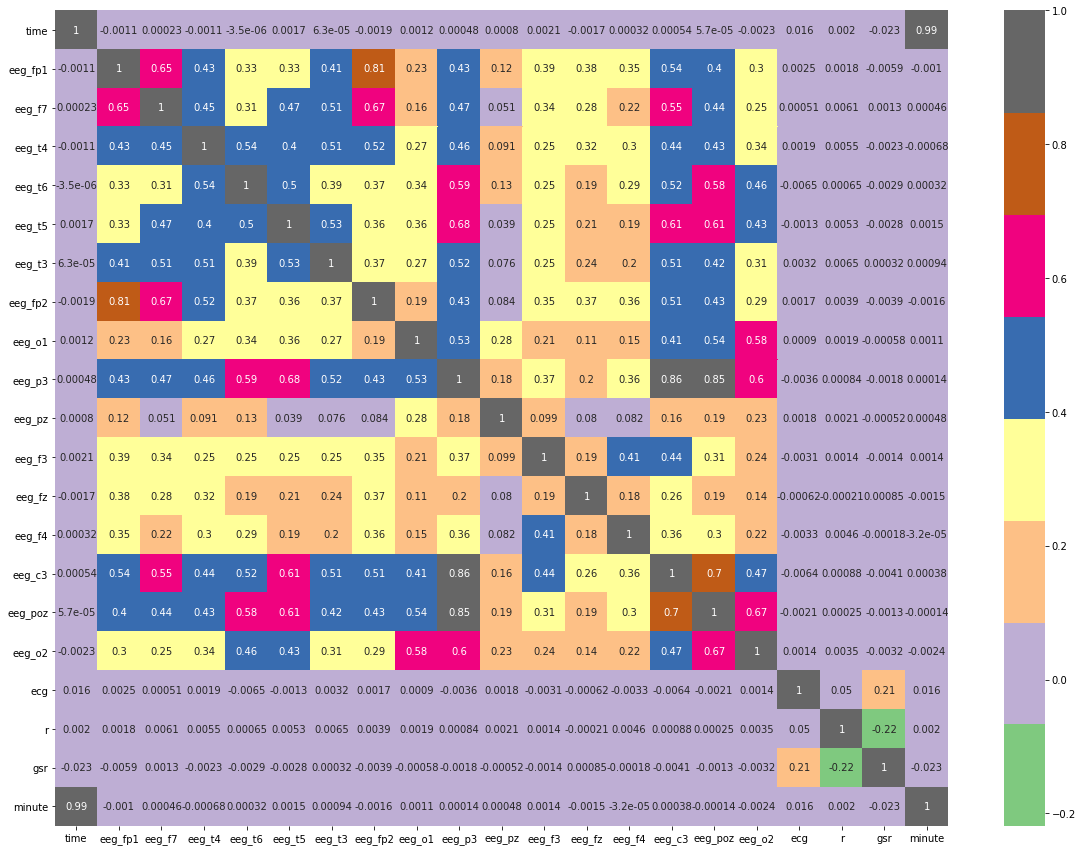

In [ ]:
#Plotting the heatmap to identify correlations between continuous variables
plt.figure(figsize=(20,15))
corr_matrix = df[correlated_continuous_cols].corr()
sns.heatmap(corr_matrix,cmap='Accent',annot=True)

Based on the above heatmap analysis we can see that the columns 'eeg_fp1',eeg_p3 and minute have high correlation with other subsequent numerical columns and hence, they are eliminated 

In [ ]:
for col in ['eeg_fp1','eeg_p3','minute','eeg_poz']:
  correlated_continuous_cols.remove(col)

# Finding dependecy between independent continuous and categorical columns to eliminate multicollinearity

In [ ]:
def multicollinearity_expt(col):
    
    grouped_df_list=[]
    for i in df.crew.unique().tolist():
        grouped_df_list.append(df.loc[df.crew==i,col].values)

    H, pval = kruskalwallis(*grouped_df_list)
    if pval < 0.05:
        print("Null Hypothesis rejected.Significant differences arise between groups \n")
    else:
        print("Fail to reject Null Hypothesis rejected.No Significant differences between groups \n")

In [ ]:
for col in correlated_continuous_cols:
  print("For column ",col," the test result is")
  multicollinearity_expt(col)

For column  time  the test result is
Null Hypothesis rejected.Significant differences arise between groups 

For column  eeg_f7  the test result is
Null Hypothesis rejected.Significant differences arise between groups 

For column  eeg_t4  the test result is
Null Hypothesis rejected.Significant differences arise between groups 

For column  eeg_t6  the test result is
Null Hypothesis rejected.Significant differences arise between groups 

For column  eeg_t5  the test result is
Null Hypothesis rejected.Significant differences arise between groups 

For column  eeg_t3  the test result is
Null Hypothesis rejected.Significant differences arise between groups 

For column  eeg_fp2  the test result is
Null Hypothesis rejected.Significant differences arise between groups 

For column  eeg_o1  the test result is
Null Hypothesis rejected.Significant differences arise between groups 

For column  eeg_pz  the test result is
Null Hypothesis rejected.Significant differences arise between groups 

Fo

As we can see from the experiment results above,that almost all the continuous variables have showing dependency with the categorical variable 'crew'.Hence,we are eliminating the variable 'crew' from the model building process as it may contribute towards multicollinearity

## Performing One-hot encoding on the categorical columns and scaling the continuous correlated columns

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
transformed_data=ss.fit_transform(df[correlated_continuous_cols])

In [ ]:
with open('scaler.pkl','wb') as file:
  pkl.dump(ss,file)

In [ ]:
df[correlated_continuous_cols] = transformed_data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 34 columns):
 #   Column      Dtype  
---  ------      -----  
 0   crew        int64  
 1   experiment  object 
 2   time        float64
 3   seat        int64  
 4   eeg_fp1     float32
 5   eeg_f7      float64
 6   eeg_f8      float32
 7   eeg_t4      float64
 8   eeg_t6      float64
 9   eeg_t5      float64
 10  eeg_t3      float64
 11  eeg_fp2     float64
 12  eeg_o1      float64
 13  eeg_p3      float32
 14  eeg_pz      float64
 15  eeg_f3      float64
 16  eeg_fz      float64
 17  eeg_f4      float64
 18  eeg_c4      float32
 19  eeg_p4      float32
 20  eeg_poz     float32
 21  eeg_c3      float64
 22  eeg_cz      float32
 23  eeg_o2      float64
 24  ecg         float64
 25  r           float64
 26  gsr         float64
 27  event       object 
 28  minute      int64  
 29  eeg_mean    float32
 30  eeg_min     float32
 31  eeg_var     float32
 32  eeg_std     float32
 33  eeg_max

In [ ]:
final_cols=correlated_continuous_cols

# Model building process

For multiclass classification generally tree based,Bayes and KNN algorithms are found to be yield good results

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [ ]:
#Splitting the dataframe into train-test
from sklearn.model_selection import train_test_split

In [ ]:
#Importing the metrics
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,classification_report,log_loss,roc_auc_score

In [ ]:
#Defining the dependent and independent features for training our models
X = df[final_cols]
y = df['event']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=12)

In [ ]:
rf = RandomForestClassifier(n_estimators=64,n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
# Save to rnadom_forest model in the current working directory
pkl_filename = "rf_model.pkl"
with open(pkl_filename, 'wb') as file:
    pkl.dump(rf, file)

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
#defining the custom log-loss for multiclass classification instance
def multiclasslogloss(pred,test):
  test_score={}
  test_dum = pd.get_dummies(test)
  pred_dum = pd.get_dummies(pred)
  for col in test_dum.columns:
      temp = log_loss(test_dum[col],pred_dum[col])
      test_score[col]=temp

  return pd.DataFrame(test_score,index=[0])

In [ ]:
#Calculating the accuracy on the train dataset
rf.score(X_train,y_train)

1.0

In [ ]:
#Calculating the accuracy on the test dataset
rf.score(X_test,y_test)

0.9985454318341693

In [ ]:
multiclasslogloss(rf_pred,y_test)

,A,B,C,D
0,0.04984,0.00133,0.00599,0.04331


In [ ]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00    712562
           B       1.00      1.00      1.00     32626
           C       1.00      1.00      1.00    413087
           D       1.00      0.97      0.99     58581

    accuracy                           1.00   1216856
   macro avg       1.00      0.99      1.00   1216856
weighted avg       1.00      1.00      1.00   1216856



Building a xgboost model

In [ ]:
xgb = XGBClassifier(objective='objective=multi:softmax',random_state=12)

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=12,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Calculating the accuracy on the train dataset
xgb.score(X_train,y_train)

0.8430900422263403

In [ ]:
xgb.score(X_test,y_test)

0.8435936544669214

In [ ]:
xgb_pred=xgb.predict(X_test)

In [ ]:
multiclasslogloss(xgb_pred,y_test)

,A,B,C,D
0,5.36596,0.87030,2.91205,1.65599


In [ ]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           A       0.80      0.99      0.88    712562
           B       0.82      0.08      0.14     32626
           C       0.97      0.77      0.86    413087
           D       0.99      0.00      0.01     58581

    accuracy                           0.84   1216856
   macro avg       0.89      0.46      0.47   1216856
weighted avg       0.87      0.84      0.81   1216856



In [ ]:
# Save to xgboost model in the current working directory
pkl_filename = "xgb_model.pkl"
with open(pkl_filename, 'wb') as file:
    pkl.dump(xgb, file)

Building a KNN Classifier

In [ ]:
test_datatypes = {}

for col in correlated_continuous_cols:
       test_datatypes[col]=np.float32

In [ ]:
test = pd.read_csv('test.csv.zip',dtype=test_datatypes,usecols=correlated_continuous_cols)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965143 entries, 0 to 17965142
Data columns (total 17 columns):
 #   Column   Dtype  
---  ------   -----  
 0   time     float32
 1   eeg_f7   float32
 2   eeg_t4   float32
 3   eeg_t6   float32
 4   eeg_t5   float32
 5   eeg_t3   float32
 6   eeg_fp2  float32
 7   eeg_o1   float32
 8   eeg_pz   float32
 9   eeg_f3   float32
 10  eeg_fz   float32
 11  eeg_f4   float32
 12  eeg_c3   float32
 13  eeg_o2   float32
 14  ecg      float32
 15  r        float32
 16  gsr      float32
dtypes: float32(17)
memory usage: 1.1 GB


In [ ]:
for col in correlated_continuous_cols:
  test=remove_outlier(test,col)

In [ ]:
test[correlated_continuous_cols]=ss.transform(test[correlated_continuous_cols])

In [ ]:
rf_test_pred = rf.predict(test)

In [ ]:
test_rf = pd.get_dummies(rf_test_pred)

In [ ]:
test_rf

,A,B,C,D
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
17965138,0,0,1,0
17965139,1,0,0,0
17965140,1,0,0,0
17965141,1,0,0,0


In [ ]:
xgb_test_pred = xgb.predict(test)

In [ ]:
#knn = KNeighborsClassifier(n_neighbors=313)

In [ ]:
#knn.fit(X_train,y_train)

In [ ]:
#knn_pred = knn.predict(X_test)

In [ ]:
#knn.score(X_test,y_test)

In [ ]:
#print(classification_report(y_test,knn_pred))

## Saving the final model in a pickle file